In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [7]:
IMAGES_PATH = Path(r'C:\Users\Asus\dataScience\ineuron\handson-ml3\mineHOML3\datas\images_dataset')
IMAGES_PATH

WindowsPath('C:/Users/Asus/dataScience/ineuron/handson-ml3/mineHOML3/datas/images_dataset')

In [8]:
import urllib.request
homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)


In [10]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

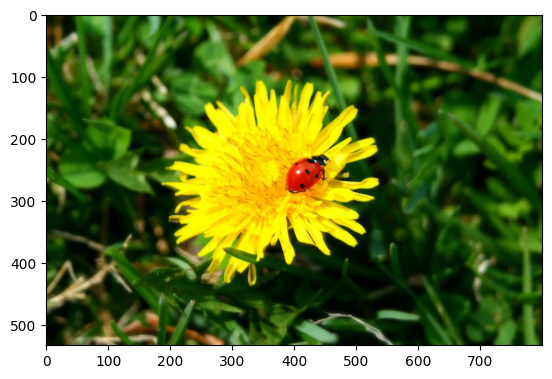

In [11]:
plt.imshow(image)

In [21]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [20]:
print(X.shape)

(426400, 3)


In [22]:
kmeans.cluster_centers_# shape=(8,3)
kmeans.labels_.shape

(426400,)

In [29]:
segmented_image =kmeans.cluster_centers_[kmeans.labels_] # we want cluster center of each kmeans.labels_
print(segmented_image.shape)
# len(np.unique(kmeans.cluster_centers_[kmeans.labels_])) # 8*3=24

(426400, 3)


In [42]:
segmented_image.min(), segmented_image.max()

(1.4755288626403509, 250.8033908320302)

In [32]:
segmented_image = segmented_image.reshape(image.shape)

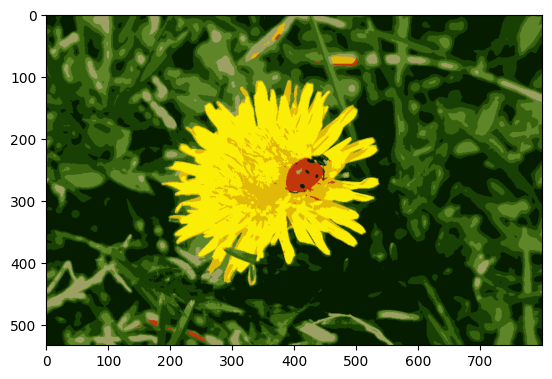

In [40]:
plt.imshow(segmented_image/255)

In [46]:
## WAP to segment image in 10, 8, 6, 4, 2 colors using KMeans and plot all the results
segmented_images = []
X = image.reshape(-1, 3)
n_clusters = [10, 8, 6, 4, 2]
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_images.append(segmented_image.reshape(image.shape))

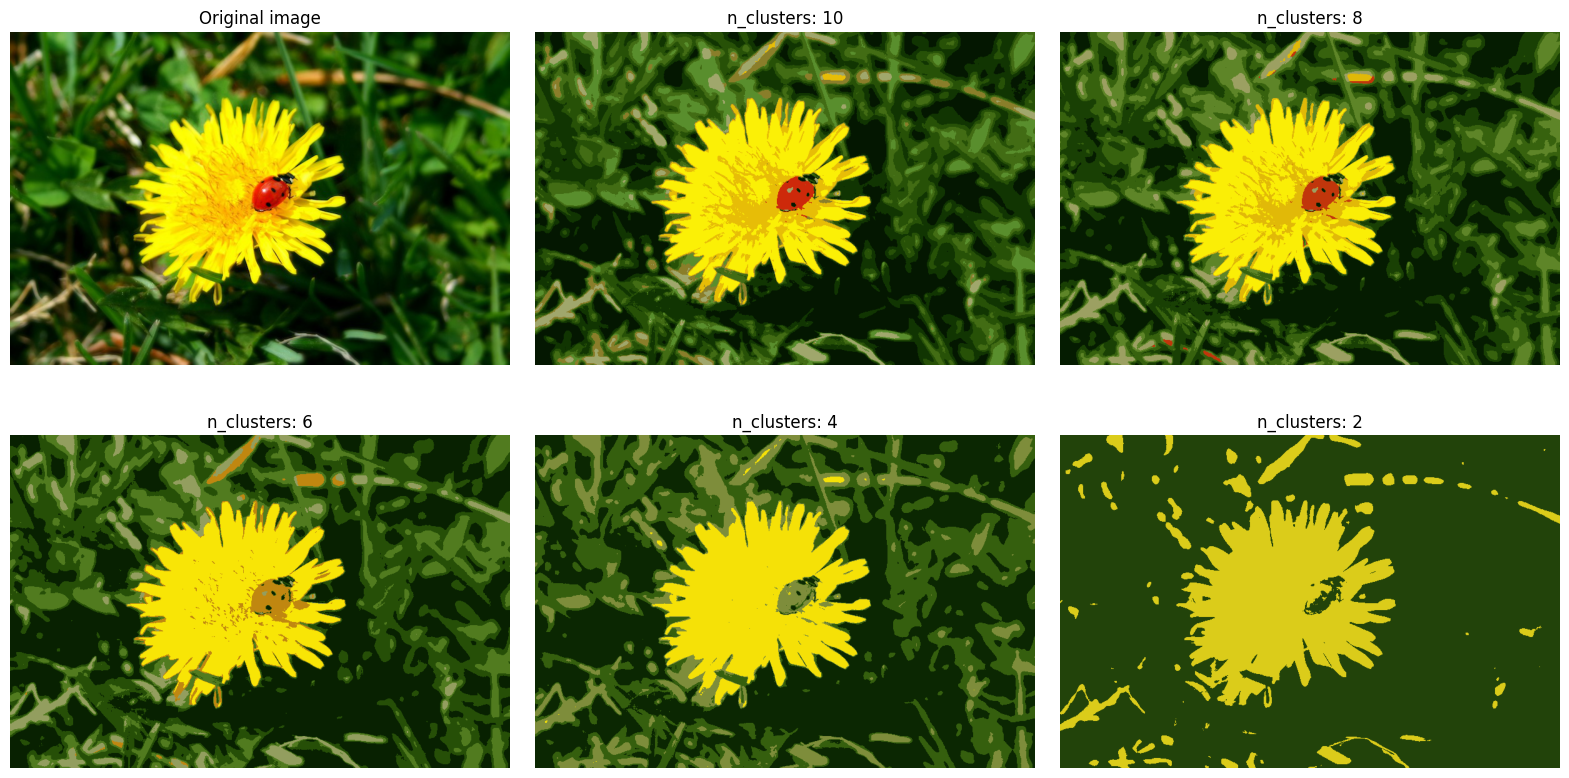

In [48]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(2, 3, 2+idx)
    plt.imshow(segmented_images[idx]/255)
    plt.title(f"n_clusters: {n_cluster}")
    plt.axis('off')

plt.show()

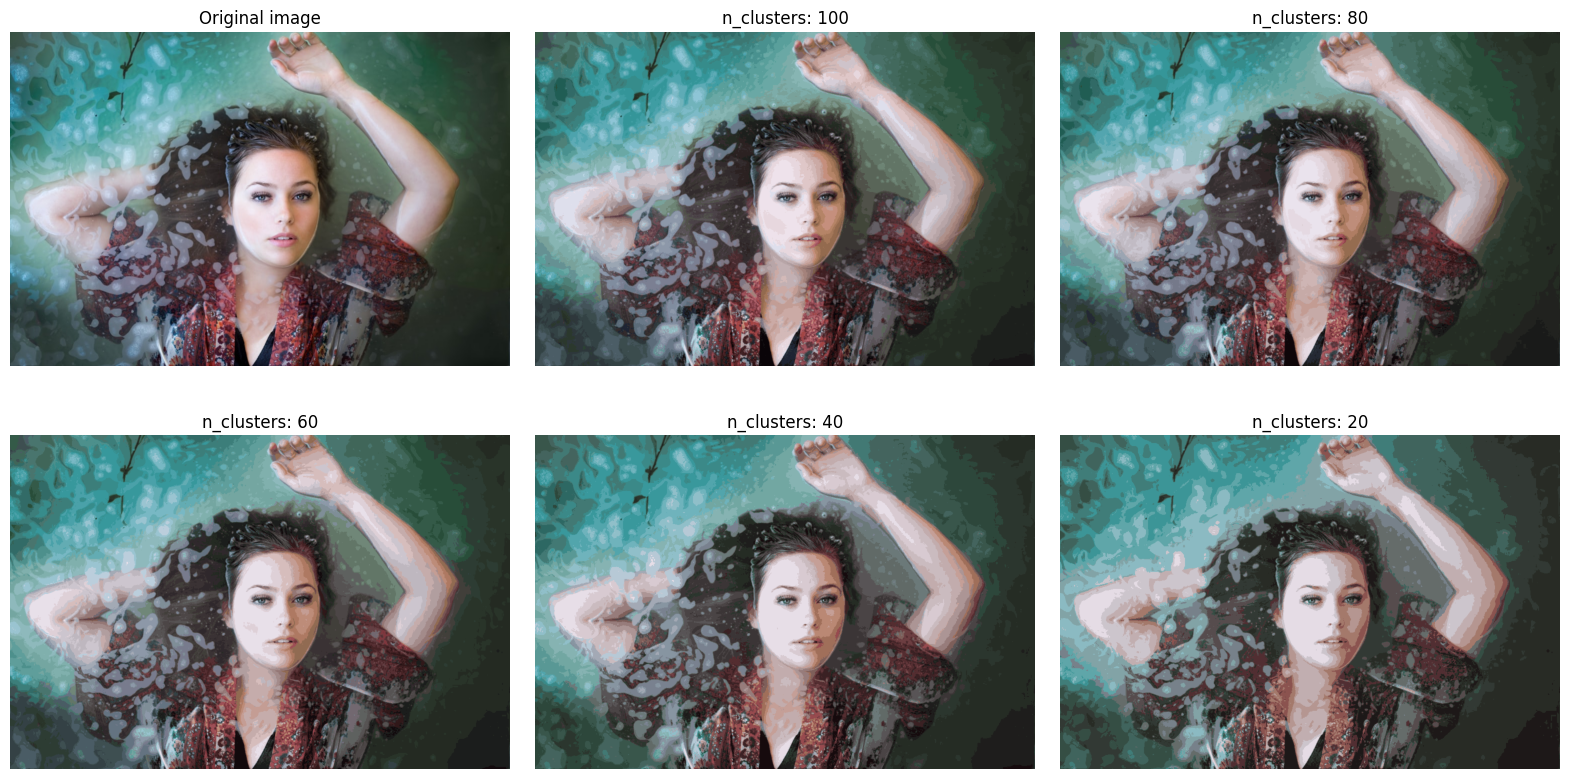

In [50]:
segmented_images = []
image = np.array(PIL.Image.open(IMAGES_PATH / 'waterWoman.jpeg'))
X = image.reshape(-1, 3)
n_clusters = [100, 80, 60, 40, 20]
for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_images.append(segmented_image.reshape(image.shape))
    
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_cluster in enumerate(n_clusters):
    plt.subplot(2, 3, 2+idx)
    plt.imshow(segmented_images[idx]/255)
    plt.title(f"n_clusters: {n_cluster}")
    plt.axis('off')

plt.show()